<center><font size="10"> 🔥Dimensionality Reduction🔥 </font></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## PCA
#
#### Lets create a dummy 3d data

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496],
       [ 1.11816122,  0.32508721,  0.31710572],
       [-1.02258878, -0.64384064, -0.13368695],
       [ 0.67351984, -0.27342519, -0.00787835],
       [ 1.01619558,  0.51546608,  0.46783297],
       [ 0.54957723,  0.67728016,  0.2340159 ],
       [-0.98960443,  0.00886617, -0.12152034],
       [ 1.13248106,  0.28229967,  0.06972972],
       [-0.99337712, -0.26832824, -0.15761101],
       [-0.94763679, -0.4995849 , -0.13927911],
       [ 1.10095709,  0.1706481 ,  0.09790432],
       [-0.34604591,  0.45334414,  0.06433843],
       [ 0.69102621, -0.27337761, -0.05926516],
       [ 0.68302902,  0.70421846,  0.24642318],
       [ 0.8774031 , -0.16775101, -0.02162333],
       [-1.06090127, -0.48213721, -0.38573526],
       [ 0.52336644,  0.66585845,  0.390

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

In [5]:
X2D

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

#### Using Sckit Learn for PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [7]:
X2D

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049],
       [-1.10436914,  0.20204953],
       [ 1.27265808,  0.46781247],
       [-0.44933007,  0.67736663],
       [-1.09356195, -0.04467792],
       [-0.66177325, -0.28651264],
       [ 1.04466138, -0.11244353],
       [-1.05932502,  0.31189109],
       [ 1.13761426,  0.14576655],
       [ 1.16044117,  0.36481599],
       [-1.00167625,  0.39422008],
       [ 0.2750406 , -0.34391089],
       [-0.45624787,  0.69707573],
       [-0.79706574, -0.26870969],
       [-0.66924929,  0.65520024],
       [ 1.30679728,  0.37671343],
       [-0.6626586 , -0.32706423],
       [ 1.25387588,  0.56043928],
       [ 1.04046987, -0.08727672],
       [ 1.26047729,  0.1571074 ],
       [-1.09786649,  0.38643428],
       [-0.7130973 ,  0.64941523],
       [ 0.17786909, -0.43609071],
       [-1.02975735,  0.33747452],
       [ 0.94552283,

In [8]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

#### This tells you that 84.2% of the dataset’s variance lies along the first axis, and 14.6% lies along the second axis. This leaves less than 1.2% for the third axis, so it is reasonable to assume that it probably carries little information.

#### Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

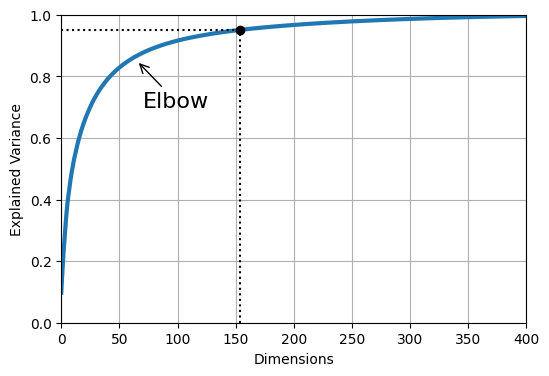

In [12]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
            arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

#### Compresion and Recovery

In [13]:
pca = PCA(n_components=154)
X_reduced= pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

### Randomized PCA

In [14]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

X_reduced

array([[-5.63825594e+02,  3.76211585e+02,  5.47809263e+02, ...,
         4.82058892e+01, -1.91493701e+01, -4.43994817e-01],
       [-2.47606773e+02,  5.94115812e+02, -7.61176589e+02, ...,
        -2.58493091e+00, -1.98368718e+01,  2.33418110e+01],
       [-7.61068947e+01, -7.18886267e+02, -6.21347158e+02, ...,
        -6.26469450e+01, -6.78129283e+01, -4.30776717e+01],
       ...,
       [ 4.46897686e+02,  2.00538445e+02, -3.26087854e+02, ...,
        -4.32439831e+01, -3.17267547e+01, -5.03358647e+01],
       [ 7.94828987e+02, -1.64978790e+02,  4.84146893e+01, ...,
        -2.34583745e+01, -7.23373049e+00, -1.57444621e+01],
       [-9.03114239e+02, -4.56076540e+02, -1.39585123e+02, ...,
        -1.31741735e+01,  3.78794323e+01, -1.69846251e+00]])

### Incremental PCA

In [15]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_train)

X_reduced = inc_pca.transform(X_train)

### Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
                ('kpca', KernelPCA(n_components=2)),
                ('log_reg', LogisticRegression()),
])

param_grid = [{
            "kpca__gamma": np.linspace(0.03, 0.05, 10),
            "kpca__kernel": ['rbf','sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X,y)

grid_search.best_params_

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

### LLE (Locally Linear Embedding)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding


lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)